<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo4/blob/main/M4_L2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 4
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes
- Juan David Pava, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Instalan las librerías que no incluye Google Colab

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=dfb5c87d64e80b20210a61b39cdf80ca69c082e18460b531514d06c6a761f7d7
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=b350251699f2c209f55188bd09a2c590024c5d313d12ac300013f79d55140bbd
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


#### 1.2. Se cargan las librerías necesarias

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

# Análisis Técnico
import ta

# Funciones 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Medidas de desempeño
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

# Support Vector Machine (SVM) / Support Vector Classification (SVC)
from sklearn.svm import SVC

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Redes Neuronales / Multi-layer Perceptron (MLP) 
from sklearn.neural_network import MLPClassifier

## 2. Obtención de datos históricos


https://finance.yahoo.com/

In [ ]:
# Descargamos datos de USD-JPY
df = yfin.download('JPY=X',start='2016-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,120.288002,120.288002,120.288002,120.288002,120.288002,0
2016-01-04,120.317001,120.447998,118.720001,120.310997,120.310997,0
2016-01-05,119.473999,119.680000,118.801003,119.467003,119.467003,0
2016-01-06,119.099998,119.150002,118.260002,119.101997,119.101997,0
2016-01-07,118.609001,118.752998,117.363998,118.610001,118.610001,0
...,...,...,...,...,...,...
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0
2020-12-30,103.552002,103.570000,102.962997,103.558998,103.558998,0


## 3. Análisis Técnico 

In [ ]:
# Incluir todo el anáñisis técnico a la base de datos
df['EMA_5'] = ta.trend.ema_indicator(close=df["Close"], window=5, fillna=True)/df["Close"]
#df['EMA_10'] = ta.trend.ema_indicator(close=df["Close"], window=10, fillna=True)/df["Close"]
#df['EMA_15'] = ta.trend.ema_indicator(close=df["Close"], window=15, fillna=True)/df["Close"]
df['EMA_20'] = ta.trend.ema_indicator(close=df["Close"], window=20, fillna=True)/df["Close"]
df['EMA_50'] = ta.trend.ema_indicator(close=df["Close"], window=50, fillna=True)/df["Close"]
df['EMA_100'] = ta.trend.ema_indicator(close=df["Close"], window=100, fillna=True)/df["Close"]
#df['EMA_200'] = ta.trend.ema_indicator(close=df["Close"], window=200, fillna=True)/df["Close"] 

#df['EMA_5_10'] = df['EMA_5']/df['EMA_10']
#df['EMA_5_20'] = df['EMA_5']/df['EMA_20']
#df['EMA_5_50'] = df['EMA_5']/df['EMA_50']
#df['EMA_5_100'] = df['EMA_5']/df['EMA_100']
#df['EMA_5_200'] = df['EMA_5']/df['EMA_200']

#df['EMA_10_20'] = df['EMA_10']/df['EMA_20']
#df['EMA_10_50'] = df['EMA_10']/df['EMA_50']
#df['EMA_10_100'] = df['EMA_10']/df['EMA_100']
#df['EMA_10_200'] = df['EMA_10']/df['EMA_200']

#df['EMA_20_50'] = df['EMA_20']/df['EMA_50']
#df['EMA_20_100'] = df['EMA_20']/df['EMA_100']
#df['EMA_20_200'] = df['EMA_20']/df['EMA_200']

#df['EMA_50_100'] = df['EMA_50']/df['EMA_100']
#df['EMA_50_200'] = df['EMA_50']/df['EMA_200']

#df['EMA_100_200'] = df['EMA_100']/df['EMA_200']


#df['MACD'] = ta.trend.macd(close=df["Close"], fillna=True)/df["Close"] 

df['RSI'] = ta.momentum.rsi(close=df["Close"], fillna=True)

#df['BOL_H'] = ta.volatility.bollinger_hband(close=df["Close"], fillna=True)/df["Close"]
#df['BOL_L'] = df["Close"]/ta.volatility.bollinger_lband(close=df["Close"], fillna=True)

#df['BOL_H_L'] = ta.volatility.bollinger_hband(close=df["Close"], fillna=True)/ta.volatility.bollinger_lband(close=df["Close"], fillna=True)

#df['KDJ'] = ta.momentum.stoch(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)

df['ATR'] = ta.volatility.average_true_range(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)

df['WR'] = ta.momentum.williams_r(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)

#df.drop('Open', axis=1, inplace=True)
#df.drop('High', axis=1, inplace=True)
#df.drop('Low', axis=1, inplace=True)
#df.drop('Volume', axis=1, inplace=True)
#df.drop('Adj Close', axis=1, inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR
Date,,,,,,,,,,,,,
2016-01-01,120.288002,120.288002,120.288002,120.288002,120.288002,0,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-50.000000
2016-01-04,120.317001,120.447998,118.720001,120.310997,120.310997,0,0.999873,0.999827,0.999816,0.999813,100.000000,0.000000,-7.928315
2016-01-05,119.473999,119.680000,118.801003,119.467003,119.467003,0,1.004624,1.006234,1.006610,1.006740,2.467508,0.000000,-56.770659
2016-01-06,119.099998,119.150002,118.260002,119.101997,119.101997,0,1.005135,1.008431,1.009315,1.009631,1.696757,0.000000,-61.517513
2016-01-07,118.609001,118.752998,117.363998,118.610001,118.610001,0,1.006203,1.011412,1.012972,1.013545,1.167422,0.000000,-59.597849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0,1.000153,1.002482,1.007047,1.013375,42.903383,0.538116,-61.964296
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0,0.999099,1.000881,1.005315,1.011616,46.077399,0.522893,-52.678235
2020-12-30,103.552002,103.570000,102.962997,103.558998,103.558998,0,1.000235,1.001934,1.006319,1.012630,43.887889,0.537401,-47.802211


In [ ]:
# Crea el Target (1 si el precio sube el día siguiente, -1 si baja)
target = np.where(np.array(df['Close'][1:]) > np.array(df['Close'][:-1]), 1, -1)

# Elimina el ultimo día para el que no tenemos info del precio el día siguiente.
df.drop(df.tail(1).index, inplace=True)

# Creamos la columna target
df['Target'] = target

# Elimina los primeros 29 días dónde los indicadores técnicos no tienen suficiente info
df.drop(df.head(29).index, inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,Target
Date,,,,,,,,,,,,,,
2016-02-11,113.238998,113.462997,111.081001,113.251999,113.251999,0,1.019320,1.037748,1.046771,1.052706,26.420380,1.825300,-79.480177,-1
2016-02-12,112.483002,113.123001,111.755997,112.497002,112.497002,0,1.017441,1.040454,1.051687,1.058587,24.527034,1.801778,-86.616256,1
2016-02-15,113.675003,114.546997,113.278000,113.669998,113.669998,0,1.004628,1.026887,1.039232,1.046719,32.607535,1.819508,-75.529334,1
2016-02-16,114.318001,114.867996,113.660004,114.321999,114.321999,0,0.999265,1.019028,1.031999,1.039943,36.666508,1.775829,-69.366760,-1
2016-02-17,114.134003,114.495003,113.389000,114.080002,114.080002,0,1.000923,1.019172,1.032848,1.041314,35.804544,1.727984,-71.654064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,103.621002,103.654999,103.213997,103.653000,103.653000,0,0.999072,1.001582,1.006168,1.012472,44.786381,0.541510,-54.821277,-1
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0,1.000153,1.002482,1.007047,1.013375,42.903383,0.538116,-61.964296,1
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0,0.999099,1.000881,1.005315,1.011616,46.077399,0.522893,-52.678235,-1


In [ ]:
df.Target[df.Target==1].count()

627

## 4. Conjunto de entrenamiento y prueba

In [ ]:
# Divida el conjunto de datos en una característica o un conjunto de datos independiente (X) y un destino o conjunto de datos dependiente (Y)
X = df.drop('Target',axis=1)
Y = df.Target

print(X.shape)
print(Y.shape)

(1253, 13)
(1253,)


In [ ]:
# Vuelva a dividir los datos, pero esta vez en 90% de entrenamiento y 10% de prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle=False)

print(X_train.shape)
print(X_test.shape)

(877, 13)
(376, 13)


In [ ]:
#Standardization
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train.mean(),X_test.mean()


(1.3711025512430668e-17, -0.3768063068718643)

## 5. Machine Learning - Support Vector Classifier (SVC)

In [ ]:
# Crear el modelo clasificador de Support Vector Machine.

# Lineal Kernel
#svc = SVC(kernel='linear')

# Polynomial Kernel
#svc  = SVC(kernel='poly', degree=8)

# Gaussian Kernel
svc = SVC(kernel='rbf',random_state=1)

# Sigmoid Kernel
#svc = SVC(kernel='sigmoid')

# Entrenar el modelo de SVM

svc = svc.fit(X_train, Y_train)

In [ ]:
# Compruebe cómo le fue al modelo en el conjunto de datos de prueba
svm_predictions = svc.predict(X_test)

print("Accuracy: {:.4f}\n".format( accuracy_score(Y_test, svm_predictions) ))

print("Confusion Matrix:")
print( confusion_matrix(Y_test, svm_predictions) )

Accuracy: 0.5505

Confusion Matrix:
[[ 27 164]
 [  5 180]]


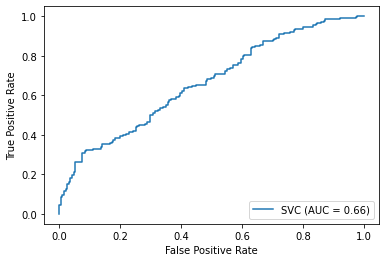

In [ ]:
# Get the model metrics
plot_roc_curve(svc, X_test, Y_test)
plt.show()

## 6. Machine Learning - Decision Tree Classifer

In [ ]:
# Crear el modelo clasificador de Árbol de Decisión.
dtc = DecisionTreeClassifier(random_state=1)

# Entrenar el Árbol de Decisión
dtc = dtc.fit(X_train, Y_train)

In [ ]:
# Compruebe cómo le fue al modelo en el conjunto de datos de prueba
dtc_predictions = dtc.predict(X_test)

print("Accuracy: {:.4f}\n".format( accuracy_score(Y_test, dtc_predictions) ))

print("Confusion Matrix:")
print( confusion_matrix(Y_test, dtc_predictions) )

Accuracy: 0.5372

Confusion Matrix:
[[103  88]
 [ 86  99]]


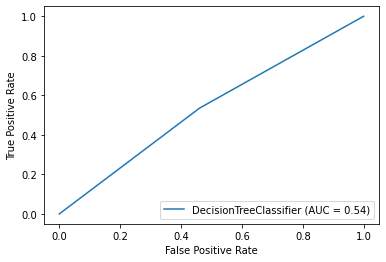

In [ ]:
plot_roc_curve(dtc, X_test, Y_test)
plt.show()

## 7. Machine Learning - Random Forest Classifier

In [ ]:
# Crear el modelo clasificador de Random Forest.
rfc = RandomForestClassifier(random_state=1)

# Entrenar el modelo de Random Forest
rfc = rfc.fit(X_train, Y_train)


In [ ]:
# Compruebe cómo le fue al modelo en el conjunto de datos de prueba
rfc_predictions = rfc.predict(X_test)

print("Accuracy: {:.4f}\n".format( accuracy_score(Y_test, rfc_predictions) ))

print("Confusion Matrix:")
print( confusion_matrix(Y_test, rfc_predictions) )

Accuracy: 0.5851

Confusion Matrix:
[[113  78]
 [ 78 107]]


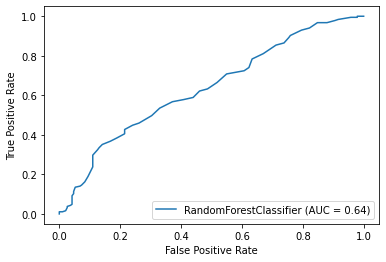

In [ ]:
# Get the model metrics
plot_roc_curve(rfc, X_test, Y_test)
plt.show()

## 8. Machine Learning - Redes neuronales / Multilayer Perceptron (MLP)

In [ ]:
# Crear el modelo clasificador de Redes Neuronales.
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(32,16), max_iter=1000,random_state=1)

# Entrenar el modelo de Redes Neuronales
mlp = mlp.fit(X_train, Y_train)

In [ ]:
# Compruebe cómo le fue al modelo en el conjunto de datos de prueba
mlp_predictions = mlp.predict(X_test)

print("Accuracy: {:.4f}\n".format( accuracy_score(Y_test, mlp_predictions) ))

print("Confusion Matrix:")
print( confusion_matrix(Y_test, mlp_predictions) )

Accuracy: 0.7234

Confusion Matrix:
[[ 96  95]
 [  9 176]]


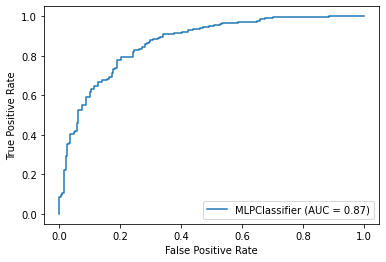

In [ ]:
# Get the model metrics
plot_roc_curve(mlp, X_test, Y_test)
plt.show()

In [ ]:
rfc.feature_importances_

array([0.08335549, 0.09777437, 0.10306447, 0.08444629, 0.08173718,
       0.        , 0.07387295, 0.07194112, 0.07210037, 0.07523331,
       0.07221627, 0.07582106, 0.10843711])

In [ ]:
x1 = np.array([109.685997, 110.071999, 109.667999, 109.698997, 0, 1.000124, 1.001453, 1.001706, 0.998667, 46.921401, 0.547440, -55.882556]).reshape((1, 12))
x1_test = ss.transform(x1)

y1 = mlp.predict(x1_test)
y1

ValueError: ignored

In [ ]:
# Get the model metrics
plot_roc_curve(mlp, X_train, Y_train)
plt.show()